# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:

# Install library yang dibutuhkan
!pip install pandas scikit-learn matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:

# Load dataset
df = pd.read_csv('Train.csv')  # ganti sesuai path file
df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# Ukuran dan struktur data
print("Dataset shape:", df.shape)
print("\nInfo Dataset:")
df.info()

# Statistik ringkas
df.describe()

# Cek nilai kosong
df.isnull().sum()


Dataset shape: (10999, 12)

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0


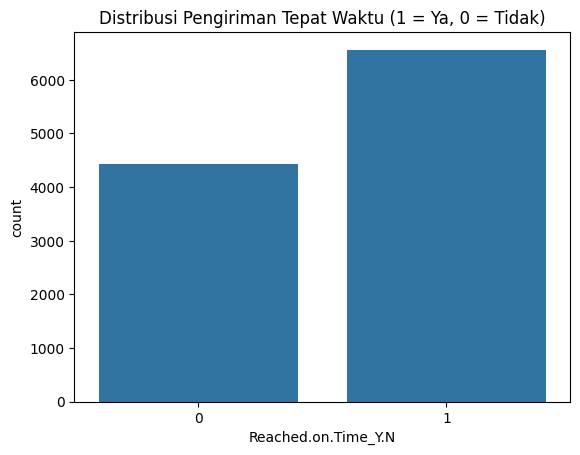

In [6]:
# Distribusi target
sns.countplot(x='Reached.on.Time_Y.N', data=df)
plt.title("Distribusi Pengiriman Tepat Waktu (1 = Ya, 0 = Tidak)")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [7]:
# 1. Cek jumlah missing values
print("Missing values:\n", df.isnull().sum())

# Jika ada missing values, kita bisa menghapus atau mengisi
# Namun dalam dataset ini, biasanya tidak ada nilai kosong



Missing values:
 ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [8]:
# 2. Cek dan hapus duplikasi
print("Jumlah duplikat:", df.duplicated().sum())
df = df.drop_duplicates()



Jumlah duplikat: 0


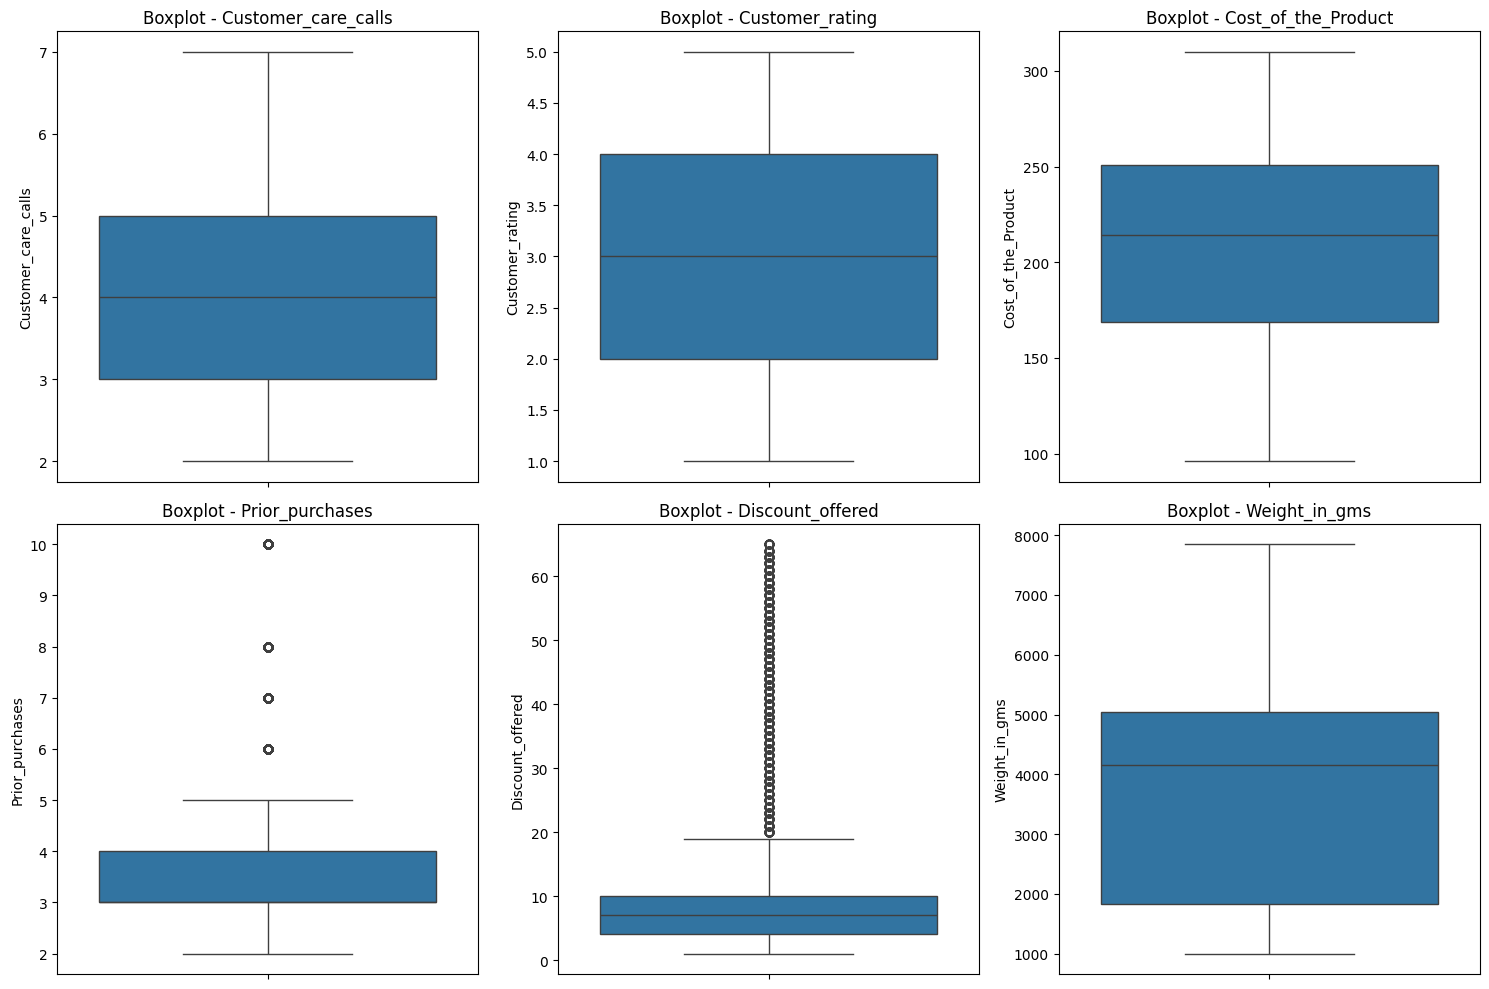

In [9]:
# 3. Cek outliers menggunakan boxplot
numerical_columns = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot - {col}")
plt.tight_layout()
plt.show()


In [10]:
# Opsional: Jika ingin menghapus outlier dengan IQR
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]


In [11]:
# 4. Encode kolom kategorikal (one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)


In [12]:
# 5. Normalisasi fitur numerik (opsional tapi bagus untuk model tertentu)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Assuming you want to scale the entire encoded dataframe
X_scaled = scaler.fit_transform(df_encoded)
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])


In [13]:
# 6. Cek hasil akhir
df_encoded.head()


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
3,4,-0.962141,0.004527,-0.781413,0.724174,1.131258,-1.716621,1,True,False,False,False,False,False,False,True,True
5,6,-0.962141,-1.410633,-1.071699,-0.284632,1.695047,-1.568407,1,False,False,False,True,False,False,False,True,False
6,7,-0.962141,0.712107,0.752955,-0.284632,-0.842007,-0.979258,1,False,False,True,False,False,False,True,False,False
8,9,-0.962141,0.712107,-1.320516,-0.284632,1.413152,-1.294212,1,False,False,False,False,False,False,True,False,False
10,11,-0.962141,0.712107,-0.511862,-1.293438,1.695047,-0.659981,1,False,True,False,False,False,False,False,True,True


In [14]:
# Simpan DataFrame yang sudah dipreproses ke file CSV
df_encoded.to_csv('preprocessed_data.csv', index=False)

print("Dataframe berhasil disimpan ke 'preprocessed_data.csv'")

Dataframe berhasil disimpan ke 'preprocessed_data.csv'
